In [1]:
# import relevant modules and files

import numpy as np
import pandas as pd

df_annotations = {}

for i in range(1, 23):
    df_annotations[i] = pd.read_csv(f"{i}permutationready.tsv", sep="\t")


In [2]:
annotations = ['3_prime_UTR_variant','5_prime_UTR_variant','NMD_transcript_variant','coding_sequence_variant','downstream_gene_variant','incomplete_terminal_codon_variant','intergenic_variant','intron_variant','mature_miRNA_variant','missense_variant','non_coding_transcript_exon_variant','non_coding_transcript_variant','splice_acceptor_variant','splice_donor_variant','splice_region_variant','start_lost','stop_gained','stop_lost','stop_retained_variant','synonymous_variant','upstream_gene_variant']


In [3]:
# do for all chromosomes
df_noheader = {}
np_df = {}
location_vec = {}
annotation_matrix = {}
a_matrix = {}

for i in range(1,23):
    df_noheader[i] = df_annotations[i].copy()
    np_df[i] = df_noheader[i].to_numpy()
    location_vec[i] = np_df[i][::,1]
    annotation_matrix[i] = np_df[i][::,2:]
    a_matrix[i] = annotation_matrix[i].transpose()

In [18]:
import random
import time

In [19]:
count_matrix = {}

tic = time.time()

for i in range(1,23):

    count_matrix[i] = np.zeros((21,10000))
    
    for j in range(0,10000):
        r = random.randint(0, len(location_vec[i]))
        new_loc = np.roll(location_vec[i], r)
        c_vec = np.matmul(a_matrix[i], new_loc)
        count_matrix[i][:,j] = c_vec
    
toc = time.time()
print("Time taken: {}".format(toc-tic))

# took 1902.6005499362946 seconds

Time taken: 655.4909727573395


In [21]:
count_matrix

{1: array([[ 5.,  1.,  5., ...,  1.,  4.,  6.],
        [ 4.,  3.,  4., ...,  5.,  0.,  0.],
        [29., 11., 16., ..., 20., 15., 32.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 4.,  1.,  8., ...,  4.,  4.,  7.],
        [45., 26., 43., ..., 52., 37., 34.]]),
 2: array([[ 5.,  4.,  2., ...,  2.,  1.,  2.],
        [ 0.,  1.,  2., ...,  0.,  1.,  0.],
        [24., 39., 44., ..., 28., 15., 25.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  1.,  1., ...,  2.,  3.,  1.],
        [31., 23., 18., ..., 35., 36., 23.]]),
 3: array([[ 2.,  2.,  1., ...,  4.,  0.,  3.],
        [ 0.,  1.,  0., ...,  1.,  1.,  0.],
        [31., 25., 62., ..., 31., 30., 27.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 1.,  3.,  0., ...,  4.,  2.,  1.],
        [20., 24., 17., ..., 37., 10., 17.]]),
 4: array([[ 2.,  3.,  1., ...,  7.,  0.,  5.],
        [ 0.,  0.,  1., ...,  0.,  0.,  0.],
        [24., 18., 14., ..., 37., 20., 20.]

In [ ]:
# save as dataframe

for i in range(1,23):
    pd.DataFrame(count_matrix[i]).to_csv(f"permdata10k_chrom{i}.tsv", sep="\t", index=False)

In [12]:
# Read in the data
count_matrix = {}

for i in range(1, 23):
    count_matrix[i] = pd.read_csv(f"permdata10k_chrom{i}.tsv", sep="\t").to_numpy()

In [16]:
count_matrix

{1: array([[ 5.,  1.,  5., ...,  1.,  4.,  6.],
        [ 4.,  3.,  4., ...,  5.,  0.,  0.],
        [29., 11., 16., ..., 20., 15., 32.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 4.,  1.,  8., ...,  4.,  4.,  7.],
        [45., 26., 43., ..., 52., 37., 34.]]),
 2: array([[ 5.,  4.,  2., ...,  2.,  1.,  2.],
        [ 0.,  1.,  2., ...,  0.,  1.,  0.],
        [24., 39., 44., ..., 28., 15., 25.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  1.,  1., ...,  2.,  3.,  1.],
        [31., 23., 18., ..., 35., 36., 23.]]),
 3: array([[ 2.,  2.,  1., ...,  4.,  0.,  3.],
        [ 0.,  1.,  0., ...,  1.,  1.,  0.],
        [31., 25., 62., ..., 31., 30., 27.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 1.,  3.,  0., ...,  4.,  2.,  1.],
        [20., 24., 17., ..., 37., 10., 17.]]),
 4: array([[ 2.,  3.,  1., ...,  7.,  0.,  5.],
        [ 0.,  0.,  1., ...,  0.,  0.,  0.],
        [24., 18., 14., ..., 37., 20., 20.]

In [17]:
# calculate original number of sign SNPs in each annotation

original_number = {}

for i in range(1,23):
    original_number[i] = np.matmul(a_matrix[i],location_vec[i])


In [18]:
# count_matrix[n] for chromosome n (starts at 1, ends at 22)
# count_matrix[n][k,::] for annotation k (starts at 0, ends at 20)
# count_matrix[n][::,j] for permutation j (starts at 0, ends at 9999)

In [20]:
from collections import Counter

freq_matrix = {} # for all chromosomes

for i in range(1,23):
    
    freq_matrix[i] = {}

    for j in range(0,21):
            freq_matrix[i][j] = Counter(count_matrix[i][j,::]) # count all permutations for one annotation

In [21]:
# freq_matrix[n] is the frequency counter for chromosome n (starts at 1, ends at 22)
# freq_matrix[n][k] is the frequency counter for annotation k, chromosome n (starts at 0, ends at 20)
# freq_matrix[n][k][j] is the number of counts in j 

#freq_matrix[4]

In [22]:
# calculating enrichment
enrichment_matrix = np.zeros((22,21))

for i in range(0,22):
# each row is the count nr in the corresponding chromosome n-1 (so row 0 corresponds to chrom 1)
    for k in range(0,21): # k is the annotation nr
        for l in freq_matrix[i+1][k]: # l is number of sign SNP in annotation
            if l >= original_number[i+1][k]: # and original_number[i+1][k] != 0: 
                enrichment_matrix[i][k] = enrichment_matrix[i][k] + freq_matrix[i+1][k][l] # freq_matrix[i+1][k][l] 
                                                                              # is nr of counts of l sign SNP 
                                                                              # in annotation
                        
p_vals_e = enrichment_matrix/10000 #pvals for enrichment

# find the significant ones

idx = np.where((0 < p_vals_e) & (p_vals_e < 0.05)) # location of significant values

print(idx)
print(p_vals_e[(0 < p_vals_e) & (p_vals_e < 0.05)])

(array([ 0,  0,  0,  0,  1,  1,  1,  1,  2,  3,  3,  3,  6,  6,  6,  8, 10,
       10, 10, 11, 12, 13, 14, 15]), array([ 0,  1,  4, 20,  4,  7, 11, 13, 20,  0,  9, 16,  4, 10, 20,  9,  1,
        4, 20, 20,  1,  4, 16, 13]))
[0.0372 0.0044 0.0286 0.0112 0.0018 0.0245 0.0143 0.0325 0.0032 0.0486
 0.0064 0.0159 0.004  0.0052 0.0012 0.0009 0.0103 0.0011 0.0069 0.0325
 0.0455 0.0077 0.0266 0.0464]


In [23]:
# Calculating depletion

depletion_matrix = np.zeros((22,21))

for i in range(0,22):
# each row is the count nr in the corresponding chromosome n-1 (so row 0 corresponds to chrom 1)
    for k in range(0,21): # k is the annotation nr
        for l in freq_matrix[i+1][k]: # l is number of sign SNP in annotation
            if l <= original_number[i+1][k]: # and original_number[i+1][k] != 0: 
                depletion_matrix[i][k] = depletion_matrix[i][k] + freq_matrix[i+1][k][l] # freq_matrix[i+1][k][l] 
                                                                              # is nr of counts of l sign SNP 
                                                                              # in annotation

In [24]:
p_vals_d = depletion_matrix/10000 #pvals for enrichment

# find the significant ones

idx2 = np.where((0 < p_vals_d) & (p_vals_d < 0.05)) # location of significant values

print(idx2)
print(p_vals_d[(0 < p_vals_d) & (p_vals_d < 0.05)])


(array([ 0,  2,  5,  8, 10, 13, 15, 16, 17]), array([6, 6, 2, 6, 6, 6, 6, 9, 4]))
[0.0119 0.0164 0.0336 0.0131 0.0369 0.0168 0.0322 0.0499 0.0337]


In [25]:
np.shape(p_vals_d)

(22, 21)

In [26]:
# load package
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator,FormatStrFormatter,MaxNLocator

In [27]:
a = list(mpl.rcParams.keys())
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

In [28]:
count_matrix[1][0]

array([5., 1., 5., ..., 1., 4., 6.])

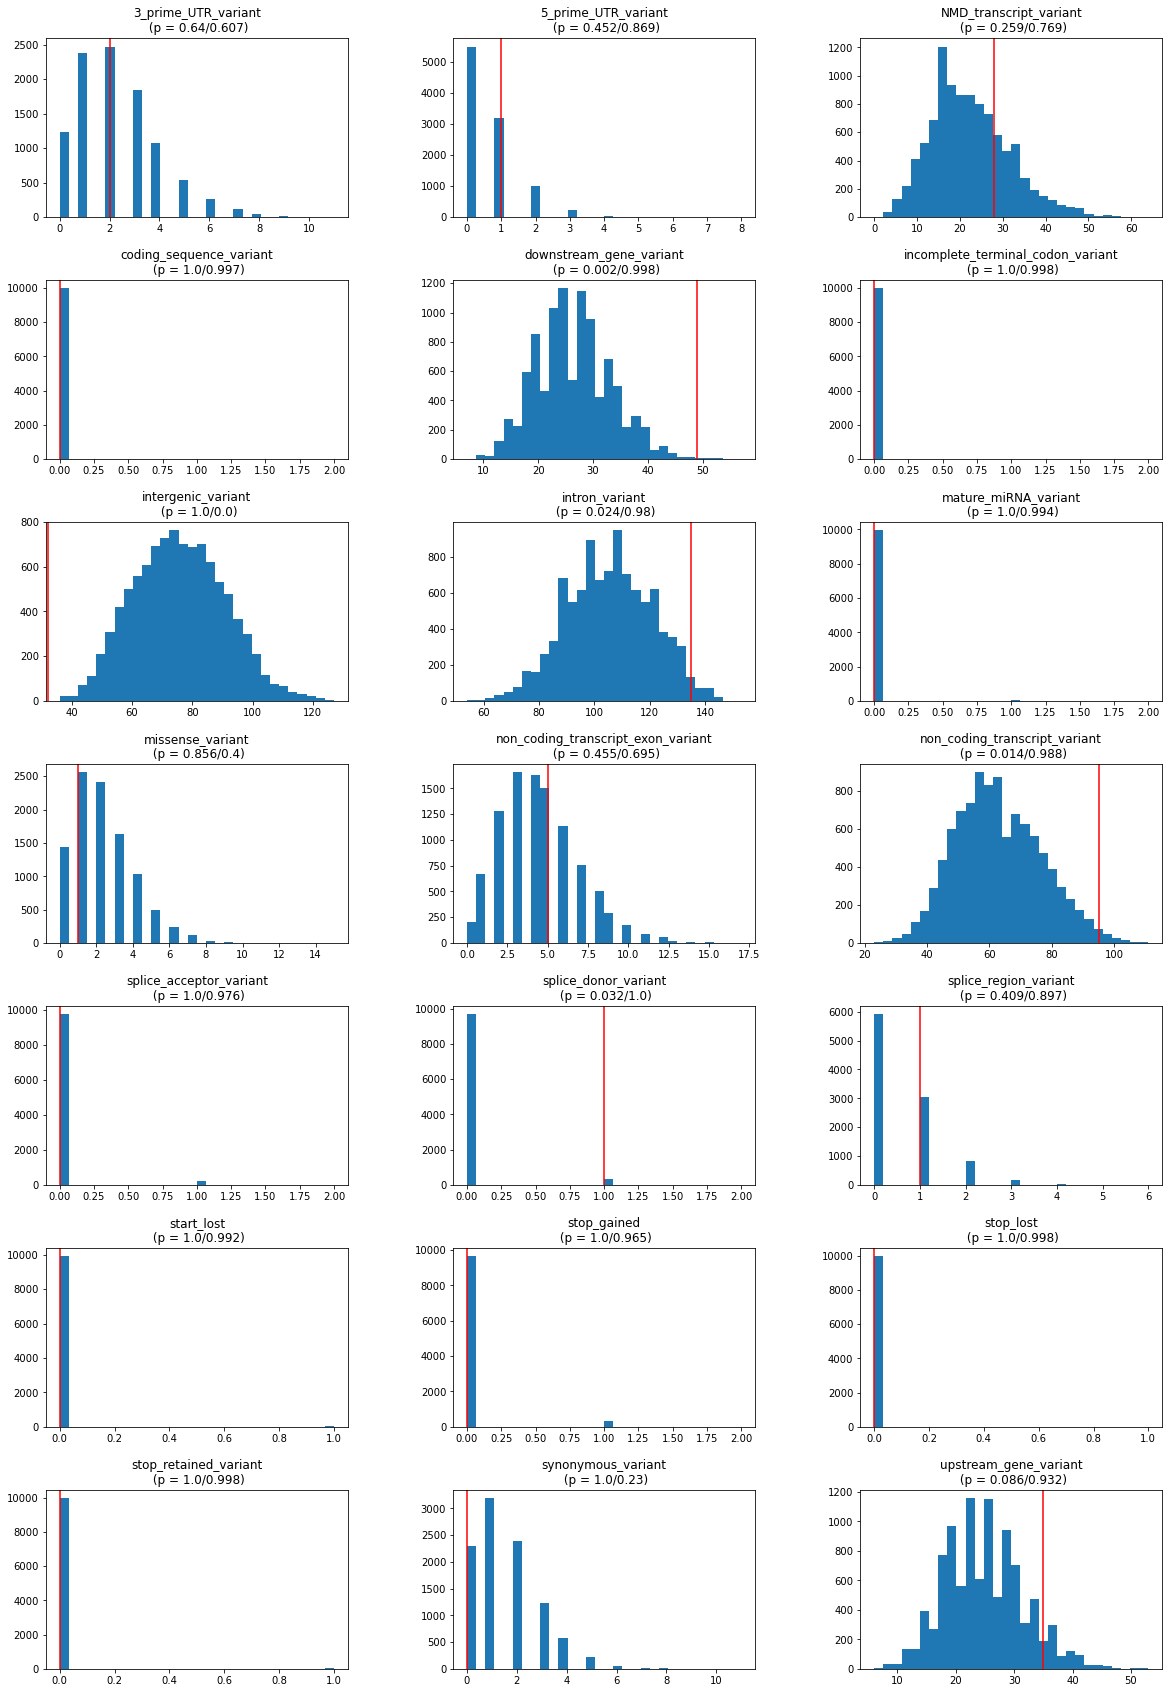

In [29]:
fig,axs = plt.subplots(nrows=7,ncols=3,figsize=(20,30),gridspec_kw={'wspace':0.35,'hspace':0.35})
i = 2 # chromosome
l = -1
for j in range(0,7):
    for k in range(0,3):
        l = l+1
        axs[j,k].hist(count_matrix[i][l,::], bins=30)
        axs[j,k].set_title(str(annotations[l]) + "\n" + " (p = " + str(np.around(p_vals_e[i-1][l], decimals=3)) + "/" + str(np.around(p_vals_d[i-1][l], decimals=3)) + ")")
        axs[j,k].axvline(x=original_number[i][l], color='r', label= 'observed number' )

#fig.text(0.5, 0.04, 'common xlabel', ha='center', va='center', fontsize = 20)
#fig.text(0.06, 0.5, 'common ylabel', ha='center', va='center', rotation='vertical', fontsize=20)
#for ax in axs.flat:
   # ax.set(xlabel='Number of significant SNPs', ylabel='Frequency')

plt.savefig("chrom_" +str(i)+ "_10k")

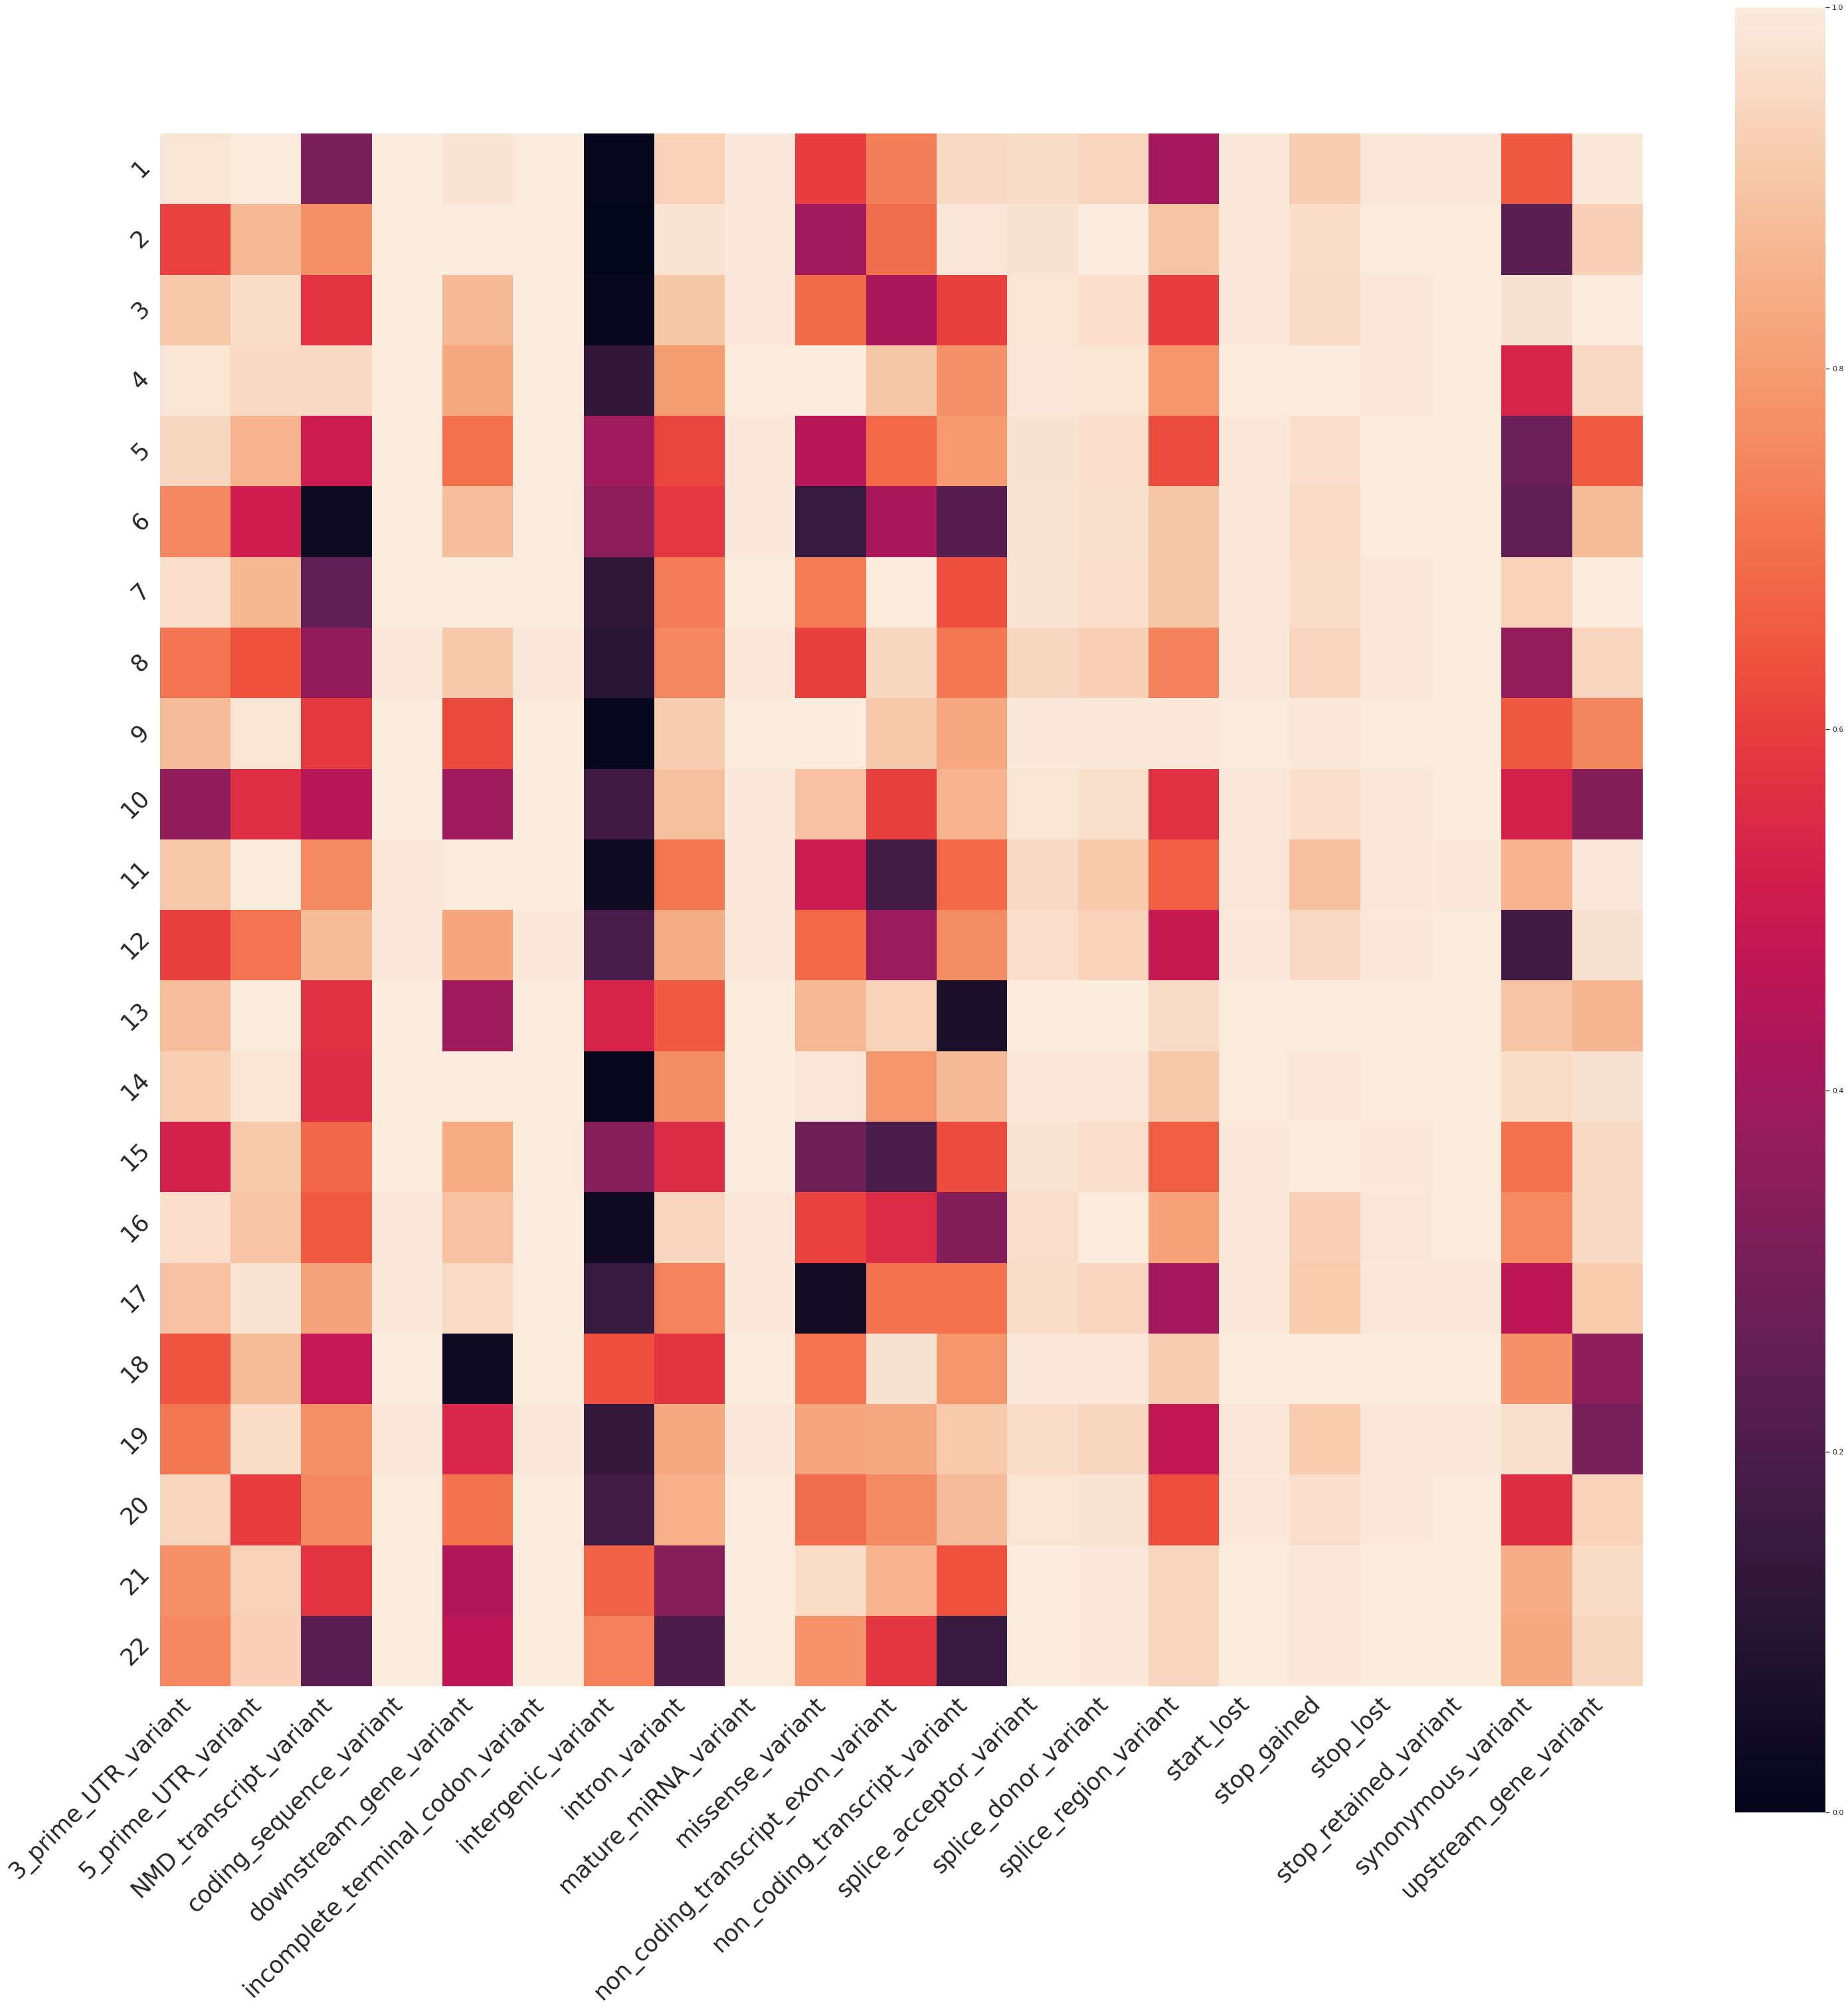

In [42]:
# Graphs for chromosome 1
import seaborn as sns

mat1 = sns.heatmap(p_vals_d, linecolor='white', square=True)
sns.set(rc={'figure.figsize':(50,50)})

x = annotations
y = range(1,23)
#mat1.set_ticks(np.arange(SNP_number.shape[1]), labels=col_labels)
mat1.set_xticklabels(x, rotation=45,horizontalalignment='right', fontsize=35)
mat1.set_yticklabels(y, rotation=45,horizontalalignment='right', fontsize=35)


mat1.figure.savefig("depletion_chrom1.png")